<a href="https://colab.research.google.com/github/Anisafi/T3-deeplearning/blob/main/Klasifikasi_Multilable_BumbuMasakkan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization

In [3]:
#image_directory = 'DatasetMultilable_AnisahFitriani_202255202069/DatasetMultilable_AnisahFitriani_202255202069/'

#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("anisahfitriani/dataset-multilable-bumbu-masakkan")

#print("Path to dataset files:", path)


In [4]:
import os
os.environ["KAGGLE_USERNAME"] = "anisahfitriani" # Ganti dengan username Kaggle Anda
os.environ["KAGGLE_KEY"] = "72d6c6a3cc093cf7c22558c6a7f29ebd" # Ganti dengan key yang ada di kaggle.json


In [5]:
!kaggle datasets download -d anisahfitriani/dataset-multilable-bumbu-masakkan


Dataset URL: https://www.kaggle.com/datasets/anisahfitriani/dataset-multilable-bumbu-masakkan
License(s): CC0-1.0
 86% 324M/376M [00:02<00:00, 84.6MB/s]
100% 376M/376M [00:02<00:00, 133MB/s] 


In [6]:
# prompt: unzip file dataset-multilable-bumbu-masakkan.zip

!unzip dataset-multilable-bumbu-masakkan.zip

Archive:  dataset-multilable-bumbu-masakkan.zip
  inflating: DatasetMultilable_AnisahFitriani_202255202069.csv  
  inflating: DatasetMultilable_AnisahFitriani_202255202069/An202255001.jpg  
  inflating: DatasetMultilable_AnisahFitriani_202255202069/An202255002.jpg  
  inflating: DatasetMultilable_AnisahFitriani_202255202069/An202255003.jpg  
  inflating: DatasetMultilable_AnisahFitriani_202255202069/An202255004.jpg  
  inflating: DatasetMultilable_AnisahFitriani_202255202069/An202255005.jpg  
  inflating: DatasetMultilable_AnisahFitriani_202255202069/An202255006.jpg  
  inflating: DatasetMultilable_AnisahFitriani_202255202069/An202255007.jpg  
  inflating: DatasetMultilable_AnisahFitriani_202255202069/An202255008.jpg  
  inflating: DatasetMultilable_AnisahFitriani_202255202069/An202255009.jpg  
  inflating: DatasetMultilable_AnisahFitriani_202255202069/An202255010.jpg  
  inflating: DatasetMultilable_AnisahFitriani_202255202069/An202255011.jpg  
  inflating: DatasetMultilable_AnisahFit

In [7]:
#Now let us read metadata to get our Y values (multiple lables)
# Try reading with semicolon as delimiter
try:
    df = pd.read_csv('/content/DatasetMultilable_AnisahFitriani_202255202069.csv', sep=';')
    print("Read with semicolon delimiter successful.")
except pd.errors.ParserError: # Changed to pd.errors.ParserError for clarity
    print("Reading with semicolon delimiter failed. Trying default comma delimiter (might still fail).")
    df = pd.read_csv('/content/DatasetMultilable_AnisahFitriani_202255202069.csv')

print(df.head())     # printing first five rows of the file
print(df.columns)

df = df.iloc[:2000].reset_index(drop=True)  #Loading only first 2000 datapoints and reset the index
#Need to read images using the tag from metadata.
#Otherwise, if read directly from the folder then images may not correspond to
#the metadata from the csv file.

Read with semicolon delimiter successful.
            id jenis bumbu masakkan  tomat  bawang merah  bawang putih  jeruk  \
0  An202255001          tomat,jeruk      1             0             0      1   
1  An202255002   bawang putih,jeruk      0             0             1      1   
2  An202255003         kemiri,jeruk      0             0             0      1   
3  An202255004         kemiri,jeruk      0             0             0      1   
4  An202255005         tomat,kemiri      1             0             0      0   

   kemiri  
0       0  
1       0  
2       1  
3       1  
4       1  
Index(['id', 'jenis bumbu masakkan', 'tomat', 'bawang merah', 'bawang putih',
       'jeruk', 'kemiri'],
      dtype='object')


In [8]:
SIZE = 200
X_dataset = []
#Define image_directory before it's used in the loop
image_directory = '/content/DatasetMultilable_AnisahFitriani_202255202069' # Change to extracted image directory

# Print the column names to verify the correct identifier column
print(df.columns)

for i in tqdm(range(df.shape[0])):
    # Replace 'Id' with the actual column name for the image identifiers found from the print statement above
    # Added '/' as a separator between image_directory and filename
    # Changed 'YOUR_CORRECT_ID_COLUMN_NAME' to the actual column name 'id'
    img = image.load_img(image_directory + '/' + df['id'][i]+'.jpg', target_size=(SIZE,SIZE,3))
    img = image.img_to_array(img)
    img = img/255.
    X_dataset.append(img)

X = np.array(X_dataset)

Index(['id', 'jenis bumbu masakkan', 'tomat', 'bawang merah', 'bawang putih',
       'jeruk', 'kemiri'],
      dtype='object')


100%|██████████| 300/300 [00:13<00:00, 22.38it/s]


In [9]:
#
print(df['id'][7])  #King Kong

An202255008


In [10]:
print(df['jenis bumbu masakkan'][7])  #Tagged as multiple Genres.

bawang merah,bawang putih


In [11]:
#Id and Genre are not labels to be trained. So drop them from the dataframe.
#No need to convert to categorical as the dataset is already in the right format.
y = np.array(df.drop(['id', 'jenis bumbu masakkan'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.3)


In [12]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(SIZE,SIZE,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='sigmoid'))

#Do not use softmax for multilabel classification
#Softmax is useful for mutually exclusive classes, either cat or dog but not both.
#Also, softmax outputs all add to 1. So good for multi class problems where each
#class is given a probability and all add to 1. Highest one wins.

#Sigmoid outputs probability. Can be used for non-mutually exclusive problems.
#like multi label, in this example.
#But, also good for binary mutually exclusive (cat or not cat).

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 196, 196, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 196, 196, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 98, 98, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 98, 98, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 94, 94, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 47, 47, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 43, 43, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 17, 17, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 701,477 (2.68 MB)

 Trainable params: 701,125 (2.67 MB)

 Non-trainable params: 352 (1.38 KB)

In [13]:
#Binary cross entropy of each label. So no really a binary classification problem but
#Calculating binary cross entropy for each label.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [14]:
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.1797 - loss: 1.0221 - val_accuracy: 0.2889 - val_loss: 0.6825
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - accuracy: 0.2253 - loss: 0.9033 - val_accuracy: 0.0111 - val_loss: 0.6810
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2531 - loss: 0.7494 - val_accuracy: 0.0667 - val_loss: 0.6855
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3242 - loss: 0.7970 - val_accuracy: 0.1000 - val_loss: 0.7145
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.2790 - loss: 0.7231 - val_accuracy: 0.1000 - val_loss: 0.7772
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.2868 - loss: 0.6399 - val_accuracy: 0.1000 - val_loss: 0.9076
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.2802 - loss: 0.6152 - val_accuracy: 0.1000 - val_loss: 1.0223
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.2113 - loss: 0.6363 - val_accuracy: 0.1000 - val_loss:

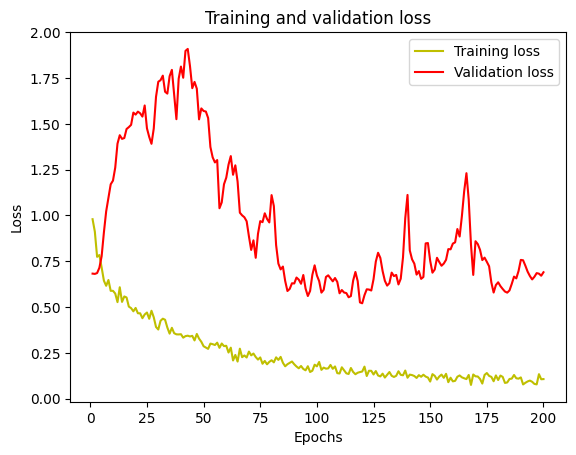

In [15]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

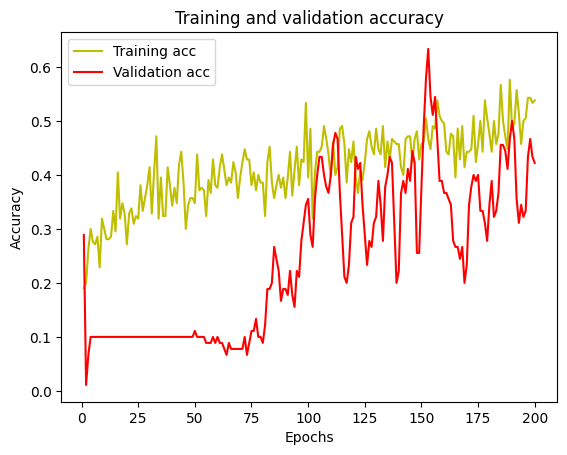

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step


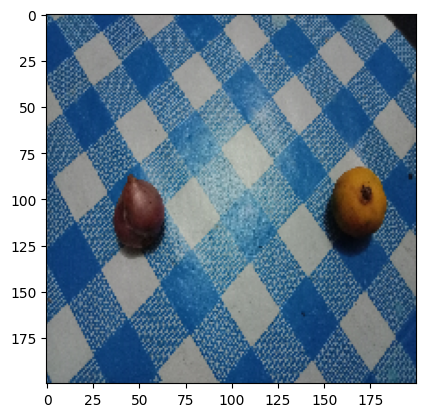

In [17]:
#Validate on an image
#img = image.load_img('/content/Multi_Label_dataset/Images/tt0085318.jpg', target_size=(SIZE,SIZE,3))
# Assuming 'ddlj.jpg' is in '/content/Multi_Label_dataset/Images/'
img = image.load_img('/content/DatasetMultilable_AnisahFitriani_202255202069/An202255007.jpg', target_size=(SIZE,SIZE,3))

img = image.img_to_array(img)
img = img/255.
plt.imshow(img)
img = np.expand_dims(img, axis=0)

classes = np.array(df.columns[2:]) #Get array of all classes
proba = model.predict(img)  #Get probabilities for each class
sorted_categories = np.argsort(proba[0])[:-11:-1]  #Get class names for top 10 categories


In [18]:
#Print classes and corresponding probabilities
# Iterate up to the number of available classes
for i in range(len(classes)):
    # Access elements using the sorted indices
    print("{}".format(classes[sorted_categories[i]])+" ({:.3})".format(proba[0][sorted_categories[i]]))


jeruk (0.995)
bawang merah (0.984)
bawang putih (0.0123)
kemiri (0.00663)
tomat (0.00289)


In [19]:
###################################################

_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

################################################################


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4299 - loss: 0.7382
Accuracy =  42.222222685813904 %


In [20]:
# prompt: berikan code evaluasi model

from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert probabilities to class labels (e.g., using a threshold)
y_pred_classes = (y_pred > 0.5).astype(int)  # Assuming 0.5 as the threshold

# Calculate and print the classification report
print(classification_report(y_test, y_pred_classes, target_names=classes))


# Calculate and print the confusion matrix (optional)
# Note: Confusion matrices are best visualized for binary or few-class problems
# For multi-label, confusion matrix for each label is more informative
for i in range(len(classes)):
  print(f"Confusion Matrix for {classes[i]}:")
  print(confusion_matrix(y_test[:,i], y_pred_classes[:,i]))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step
              precision    recall  f1-score   support

       tomat       0.98      0.88      0.93        50
bawang merah       0.79      0.83      0.81        64
bawang putih       0.65      0.90      0.76        50
       jeruk       0.89      0.75      0.82        53
      kemiri       0.76      0.89      0.82        53

   micro avg       0.80      0.85      0.82       270
   macro avg       0.81      0.85      0.83       270
weighted avg       0.81      0.85      0.82       270
 samples avg       0.77      0.83      0.79       270

Confusion Matrix for tomat:
[[39  1]
 [ 6 44]]
Confusion Matrix for bawang merah:
[[12 14]
 [11 53]]
Confusion Matrix for bawang putih:
[[16 24]
 [ 5 45]]
Confusion Matrix for jeruk:
[[32  5]
 [13 40]]
Confusion Matrix for kemiri:
[[22 15]
 [ 6 47]]
